# KMeans Coding Implementation

In this homework, you need to fill the TODOs in the provided code. 

We have provided with you the code for preparing the dataset. You will need to perform KMeans on the data and visualize the result.

IMPORTANT: You are **NOT** allowed to use existing machine learning package, such as sklearn.

For submission, you need to submit the completed ipynb file and also report the visualization result in the homework pdf file.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Data Preparation. DO NOT change the code below =============
# Particularly, DO NOT change the random_state. 
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
# ============================================================

In [44]:
# TODO: Implement Kmeans.
# You CANNOT use machine learning package like sklearn ======
def kmeans(X, k, iterations=100):
    n_samples, n_features = X.shape 
    np.random.seed(42)
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels==i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

        if np.allclose(new_centroids, centroids, atol=1e-4):
            break

        centroids = new_centroids

    return labels, centroids
# ============================================================

In [45]:
# KMeans Running. DO NOT change the code below ===============
k = 3
y_kmeans, centers = kmeans(X, k)
# ============================================================

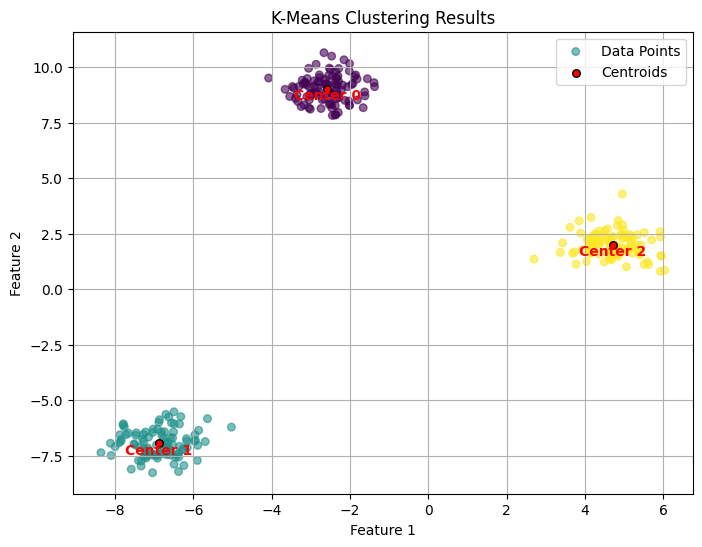

In [46]:
# TODO: Visualization =======================================
# You will need to visualize the classified results of data points using different colors.
# You will also need to label the centroids.

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, alpha=0.6, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30, edgecolor='black', label='Centroids')
for i, (x, y) in enumerate(centers):
    plt.text(x, y, f'Center {i}', fontsize=10, fontweight='bold', ha='center', va='top', color='red')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# ============================================================